## just a little Data mining on Aout and Cars data

## you can get data from kaggle form blow link

[Dataset link ](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices)

In [1]:
#load esential libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
#load data form directory 
# you have to change the link in your system
url = r'data 2/autos.csv'

In [3]:
df = pd.read_csv(url)
df.shape

(371528, 21)

In [4]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.tail()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,...,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


# PreProccessing

## part 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [7]:
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [8]:
df.dtypes

index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [9]:
df = df.dropna()
df = df.drop(columns=['index'])
df.shape

(260956, 20)

In [10]:
int_list = []
for i in df.columns:
    if df[i].dtype == 'int64':
        int_list.append(i)
int_list

['price',
 'yearOfRegistration',
 'powerPS',
 'kilometer',
 'monthOfRegistration',
 'nrOfPictures',
 'postalCode']

In [11]:
for i in int_list:
    print(f'for column = {i}  max is : {df[i].max()}  , min is : {df[i].min()}  , mean is :{df[i].mean()}')

for column = price  max is : 99999999  , min is : 0  , mean is :8208.627918116465
for column = yearOfRegistration  max is : 2018  , min is : 1910  , mean is :2003.3095004521836
for column = powerPS  max is : 20000  , min is : 0  , mean is :126.33236637594077
for column = kilometer  max is : 150000  , min is : 5000  , mean is :124058.67272643663
for column = monthOfRegistration  max is : 12  , min is : 0  , mean is :6.182551847821089
for column = nrOfPictures  max is : 0  , min is : 0  , mean is :0.0
for column = postalCode  max is : 99998  , min is : 1067  , mean is :51818.711177363235


In [12]:
int_list.remove('postalCode')
int_list.remove('nrOfPictures')
print(int_list)
df = df.drop(columns=['postalCode','nrOfPictures'])
df.shape

['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


(260956, 18)

In [13]:
#df_new = df.copy()
for i in int_list:
    low_cut = df[i].quantile(0.1)
    high_cut = df[i].quantile(0.9)
    #print(f'for i : {i}  ,  low_cut : {low_cut}  , high_cut : {high_cut}')
    df = df[(df[i] >= low_cut) & (df[i] <= high_cut)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109638 entries, 3 to 371524
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          109638 non-null  object
 1   name                 109638 non-null  object
 2   seller               109638 non-null  object
 3   offerType            109638 non-null  object
 4   price                109638 non-null  int64 
 5   abtest               109638 non-null  object
 6   vehicleType          109638 non-null  object
 7   yearOfRegistration   109638 non-null  int64 
 8   gearbox              109638 non-null  object
 9   powerPS              109638 non-null  int64 
 10  model                109638 non-null  object
 11  kilometer            109638 non-null  int64 
 12  monthOfRegistration  109638 non-null  int64 
 13  fuelType             109638 non-null  object
 14  brand                109638 non-null  object
 15  notRepairedDamage    109638 non-nu

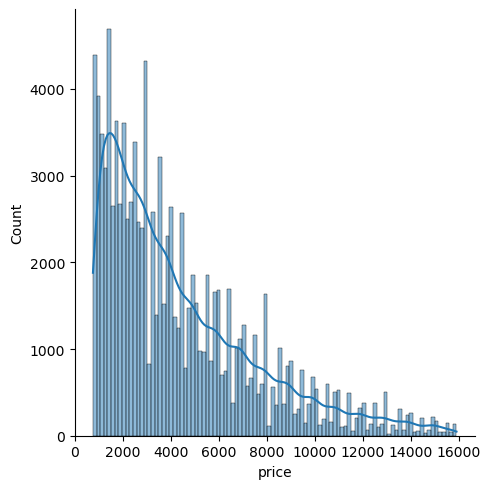

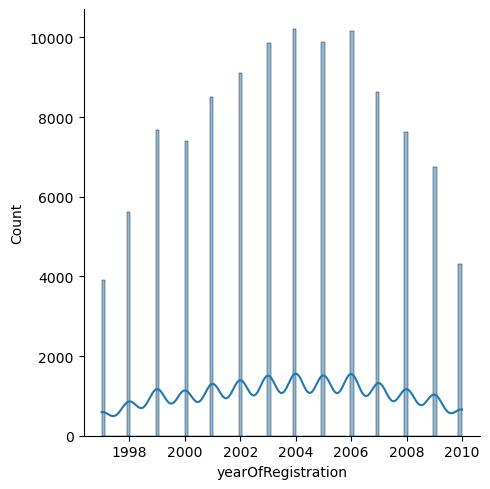

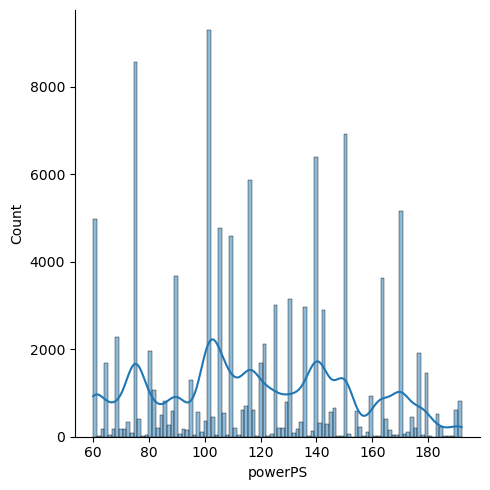

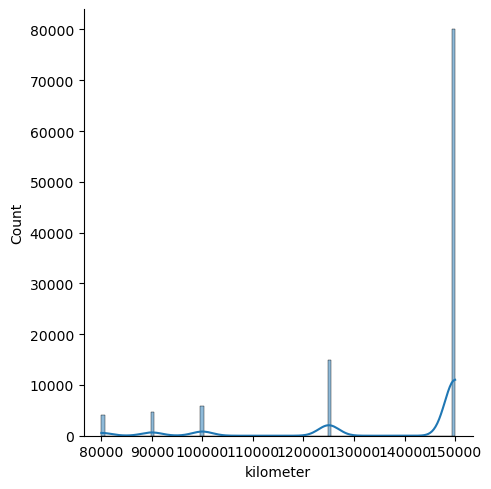

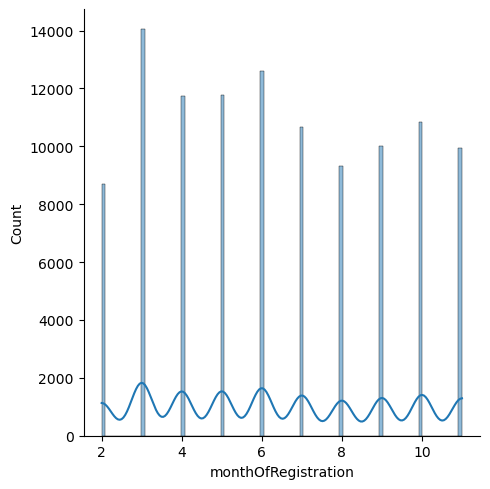

In [14]:
for i in int_list:
    sns.displot(df[i],kde=True,bins=100)

In [15]:
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39
17,2016-03-20 10:25:19,Renault_Twingo_1.2_16V_Aut.,privat,Angebot,1750,control,kleinwagen,2004,automatik,75,twingo,150000,2,benzin,renault,nein,2016-03-20 00:00:00,2016-04-06 13:16:07
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,2016-03-23 00:00:00,2016-04-05 18:45:11
20,2016-04-01 19:56:48,Volkswagen_Scirocco_1.4_TSI_Sport,privat,Angebot,10400,control,coupe,2009,manuell,160,scirocco,100000,4,benzin,volkswagen,nein,2016-04-01 00:00:00,2016-04-05 16:45:49
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,limousine,2004,automatik,122,e_klasse,150000,11,diesel,mercedes_benz,nein,2016-03-17 00:00:00,2016-03-30 15:46:10
38,2016-04-01 17:45:07,Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...,privat,Angebot,11900,test,andere,2002,manuell,129,andere,150000,11,diesel,volkswagen,nein,2016-04-01 00:00:00,2016-04-05 12:47:30
43,2016-03-13 15:47:08,Mini_One_Pepper_Scheckheftgepflegt,privat,Angebot,6990,test,limousine,2007,manuell,95,one,100000,8,benzin,mini,nein,2016-03-13 00:00:00,2016-03-21 17:17:50
46,2016-03-15 18:59:02,BMW_120d_DPF,privat,Angebot,7999,control,limousine,2007,manuell,177,1er,150000,8,diesel,bmw,nein,2016-03-15 00:00:00,2016-03-16 16:47:48


In [16]:
df.tail(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
371497,2016-03-05 15:54:11,Opel_Astra_1.6_Caravan,privat,Angebot,4900,control,kombi,2008,manuell,116,astra,150000,2,benzin,opel,nein,2016-03-05 00:00:00,2016-04-05 18:44:48
371501,2016-03-26 18:36:54,Chrysler_Voyager,privat,Angebot,3900,test,bus,2003,automatik,174,voyager,150000,7,benzin,chrysler,nein,2016-03-26 00:00:00,2016-04-06 09:16:04
371502,2016-04-01 12:59:21,Audi_A4_Avant_1.8,privat,Angebot,1600,test,kombi,1998,manuell,125,a4,150000,2,benzin,audi,nein,2016-04-01 00:00:00,2016-04-07 09:44:29
371505,2016-04-03 19:56:57,Opel_Astra_1.6_Caravan_Selection,privat,Angebot,800,test,kombi,2000,manuell,101,astra,150000,11,benzin,opel,ja,2016-04-03 00:00:00,2016-04-05 20:45:39
371506,2016-03-20 18:47:59,Volkswagen_Golf_1.9_TDI_DPF_Goal_Rentnerfzg._1...,privat,Angebot,5900,test,limousine,2006,manuell,105,golf,150000,9,diesel,volkswagen,nein,2016-03-20 00:00:00,2016-04-07 02:44:27
371508,2016-04-02 16:43:27,Opel_Astra_1.8,privat,Angebot,1400,control,limousine,2001,manuell,125,astra,150000,2,benzin,opel,nein,2016-04-02 00:00:00,2016-04-06 15:18:04
371510,2016-03-06 21:11:23,Mercedes_benz_e_klasse_avangarde_220_cdi_grune...,privat,Angebot,6500,test,limousine,2003,automatik,145,e_klasse,150000,3,diesel,mercedes_benz,nein,2016-03-05 00:00:00,2016-03-12 12:18:05
371513,2016-03-21 15:36:22,Seat_Leon_1.9_TDI_4/5_Tueren,privat,Angebot,4400,control,limousine,2008,manuell,105,leon,150000,7,diesel,seat,nein,2016-03-21 00:00:00,2016-04-06 15:45:01
371517,2016-03-28 13:48:07,Volkswagen_Golf_2.0_TDI_DPF_Team,privat,Angebot,7900,test,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-28 00:00:00,2016-04-02 18:16:20
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12


In [17]:
df = df.drop(columns=['dateCrawled','dateCreated','lastSeen'])
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
6,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
17,Renault_Twingo_1.2_16V_Aut.,privat,Angebot,1750,control,kleinwagen,2004,automatik,75,twingo,150000,2,benzin,renault,nein
18,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein


In [18]:
for i in df.columns:
    # have unique : {np.unique(df[i])} 
    print(f'column : {i}  ------   cont column : {df[i].count()} ------  uniq cont : {np.unique(df[i]).size}')

column : name  ------   cont column : 109638 ------  uniq cont : 60945
column : seller  ------   cont column : 109638 ------  uniq cont : 1
column : offerType  ------   cont column : 109638 ------  uniq cont : 2
column : price  ------   cont column : 109638 ------  uniq cont : 2009
column : abtest  ------   cont column : 109638 ------  uniq cont : 2
column : vehicleType  ------   cont column : 109638 ------  uniq cont : 8
column : yearOfRegistration  ------   cont column : 109638 ------  uniq cont : 14
column : gearbox  ------   cont column : 109638 ------  uniq cont : 2
column : powerPS  ------   cont column : 109638 ------  uniq cont : 133
column : model  ------   cont column : 109638 ------  uniq cont : 225
column : kilometer  ------   cont column : 109638 ------  uniq cont : 5
column : monthOfRegistration  ------   cont column : 109638 ------  uniq cont : 10
column : fuelType  ------   cont column : 109638 ------  uniq cont : 7
column : brand  ------   cont column : 109638 ------  

In [19]:
df = df.drop(columns=['seller'])
df.head()

,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
6,Peugeot_206_CC_110_Platinum,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
17,Renault_Twingo_1.2_16V_Aut.,Angebot,1750,control,kleinwagen,2004,automatik,75,twingo,150000,2,benzin,renault,nein
18,Ford_C_MAX_2.0_TDCi_DPF_Titanium,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein


In [20]:
df.reset_index(drop=True,inplace=True)
df

,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
1,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
2,Peugeot_206_CC_110_Platinum,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
3,Renault_Twingo_1.2_16V_Aut.,Angebot,1750,control,kleinwagen,2004,automatik,75,twingo,150000,2,benzin,renault,nein
4,Ford_C_MAX_2.0_TDCi_DPF_Titanium,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109633,Opel_Astra_1.8,Angebot,1400,control,limousine,2001,manuell,125,astra,150000,2,benzin,opel,nein
109634,Mercedes_benz_e_klasse_avangarde_220_cdi_grune...,Angebot,6500,test,limousine,2003,automatik,145,e_klasse,150000,3,diesel,mercedes_benz,nein
109635,Seat_Leon_1.9_TDI_4/5_Tueren,Angebot,4400,control,limousine,2008,manuell,105,leon,150000,7,diesel,seat,nein
109636,Volkswagen_Golf_2.0_TDI_DPF_Team,Angebot,7900,test,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein


In [21]:
one_hot_list = ['yearOfRegistration', 'monthOfRegistration']
#one_hot_list = []
for i in df.columns:
    if df[i].dtype == 'object':
        one_hot_list.append(i)

one_hot_list.remove('name')
one_hot_list

['yearOfRegistration',
 'monthOfRegistration',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [22]:
df2 = df.copy()
X = df2[one_hot_list]

for i,j in enumerate(one_hot_list):
    #print(f'i : {i} and j : {j}')
    le = LabelEncoder()
    X[j] = le.fit_transform(X.iloc[:,i].values)
    ct = ColumnTransformer([(j,OneHotEncoder(sparse=False), [i])],remainder='drop')
    X_temp = ct.fit_transform(X)
    M = pd.DataFrame(X_temp)
    col_name = {l:f'{j}_{l}' for l in M.columns}
    M.rename(columns=col_name,inplace=True)
    #print(f'M shape is : {M.shape}')
    #print(f"df 2 BEFORE shape is : {df2.shape}")
    #print('DF2 BEFORE',df2.columns)
    df2 = df2.drop(columns=[j])
    df2 = pd.concat([df2, M], axis=1)
    #print(f"df 2 AFTER shape is : {df2.shape}")
    #print('DF2 AFTER : ',df2.columns)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28072\4209932904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[j] = le.fit_transform(X.iloc[:,i].values)


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109638 entries, 0 to 109637
Columns: 313 entries, name to notRepairedDamage_1
dtypes: float64(309), int64(3), object(1)
memory usage: 261.8+ MB


In [24]:
df2.head()

,name,price,powerPS,kilometer,yearOfRegistration_0,yearOfRegistration_1,yearOfRegistration_2,yearOfRegistration_3,yearOfRegistration_4,yearOfRegistration_5,...,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,notRepairedDamage_0,notRepairedDamage_1
0,GOLF_4_1_4__3TÜRER,1500,75,150000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Skoda_Fabia_1.4_TDI_PD_Classic,3600,69,90000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Peugeot_206_CC_110_Platinum,2200,109,150000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Renault_Twingo_1.2_16V_Aut.,1750,75,150000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,136,150000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
df2.drop(columns=['name'],inplace =True)

In [26]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [37]:
Y = df2['price']
X = df2.iloc[:,1:]

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2023)

In [38]:
x_train.shape

(82228, 311)

In [39]:
sclaer_train= MinMaxScaler()
x_train.iloc[:,:] = sclaer_train.fit_transform(x_train)

In [40]:
sclaer_test = MinMaxScaler()
x_test.iloc[:,:] = sclaer_test.fit_transform(x_test)

In [210]:
#svr_reg = SVR()

In [ ]:
#svr_reg.fit(x_train,y_train)

In [181]:
#y_pred = svr_reg.predict(x_test)

In [182]:
print('price mean is : ',Y.mean())
print('price std is : ',Y.std())

price mean is :  4397.449
price std is :  3221.9314234551575


In [183]:
# mean_absolute_error(y_test,y_pred)

2431.320854235869

In [184]:
# r2_score(y_test,y_pred)

-0.0825295114346345

In [58]:
RF = RandomForestRegressor(n_estimators=100)

In [59]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
y_pred = RF.predict(x_test)

In [61]:
mean_absolute_error(y_test,y_pred)

825.0644380993554

In [62]:
r2_score(y_test,y_pred)

0.8484892685747955

In [53]:
Ada = AdaBoostRegressor(n_estimators=100)  #,base_estimator=SVR()

In [54]:
Ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [55]:
y_pred = Ada.predict(x_test)

In [56]:
mean_absolute_error(y_test,y_pred)

3006.8833279370374

In [57]:
r2_score(y_test,y_pred)

-0.1179996428321044

In [46]:
df_matrix = xgb.DMatrix(data=X,label=Y)

In [47]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=8,random_state=2023,n_estimators=1000,verbosity=3)

In [48]:
xg_reg.fit(x_train,y_train)

[13:01:40] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:157: Using tree method: 2
[13:01:40] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=8
[13:01:40] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:01:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 246 extra nodes, 0 pruned nodes, max_depth=8
[13:01:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater

[13:01:43] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 320 extra nodes, 0 pruned nodes, max_depth=8
[13:01:43] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 358 extra nodes, 0 pruned nodes, max_depth=8
[13:01:43] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 358 extra nodes, 0 pruned nodes, max_depth=8
[13:01:43] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 314 extra nodes, 0 pruned nodes, max_depth=8
[13:01:43] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 342 extra nodes, 0 pruned nodes, max_depth=8
[13:01:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 330 extra nodes, 0 pruned nodes, max_depth=8
[13:01:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 308 extra nodes, 0 pruned nodes, max_depth=8
[13:01:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 320 extra nodes, 0 pruned nodes, max_depth=8
[13:01:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:49] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=8
[13:01:49] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 278 extra nodes, 0 pruned nodes, max_depth=8
[13:01:49] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 330 extra nodes, 0 pruned nodes, max_depth=8
[13:01:49] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:01:49] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:51] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=8
[13:01:51] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 246 extra nodes, 0 pruned nodes, max_depth=8
[13:01:51] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 274 extra nodes, 0 pruned nodes, max_depth=8
[13:01:51] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=8
[13:01:51] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:54] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 288 extra nodes, 0 pruned nodes, max_depth=8
[13:01:54] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 308 extra nodes, 0 pruned nodes, max_depth=8
[13:01:54] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 296 extra nodes, 0 pruned nodes, max_depth=8
[13:01:54] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 252 extra nodes, 0 pruned nodes, max_depth=8
[13:01:54] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 298 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 230 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 264 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:01:59] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=8
[13:01:59] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=8
[13:01:59] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 244 extra nodes, 0 pruned nodes, max_depth=8
[13:01:59] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:01:59] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:02] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=8
[13:02:02] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=8
[13:02:02] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 268 extra nodes, 0 pruned nodes, max_depth=8
[13:02:02] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=8
[13:02:02] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:05] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=8
[13:02:05] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=8
[13:02:05] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=8
[13:02:05] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 232 extra nodes, 0 pruned nodes, max_depth=8
[13:02:05] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:07] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 252 extra nodes, 0 pruned nodes, max_depth=8
[13:02:07] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=8
[13:02:07] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=8
[13:02:07] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=8
[13:02:07] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da3

[13:02:10] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 302 extra nodes, 0 pruned nodes, max_depth=8
[13:02:10] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=8
[13:02:10] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:02:10] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=8
[13:02:10] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:12] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 250 extra nodes, 0 pruned nodes, max_depth=8
[13:02:12] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=8
[13:02:12] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=8
[13:02:12] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=8
[13:02:12] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:15] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:02:15] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=8
[13:02:15] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:02:15] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=8
[13:02:15] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:17] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 298 extra nodes, 0 pruned nodes, max_depth=8
[13:02:18] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=8
[13:02:18] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 166 extra nodes, 0 pruned nodes, max_depth=8
[13:02:18] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=8
[13:02:18] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da3

[13:02:20] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=8
[13:02:20] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=8
[13:02:20] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=8
[13:02:20] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=8
[13:02:20] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:23] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 286 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da3

[13:02:26] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 250 extra nodes, 0 pruned nodes, max_depth=8
[13:02:26] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=8
[13:02:26] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 230 extra nodes, 0 pruned nodes, max_depth=8
[13:02:26] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=8
[13:02:26] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:28] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 284 extra nodes, 0 pruned nodes, max_depth=8
[13:02:28] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=8
[13:02:28] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=8
[13:02:28] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=8
[13:02:28] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:31] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=8
[13:02:31] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=8
[13:02:31] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=8
[13:02:31] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 234 extra nodes, 0 pruned nodes, max_depth=8
[13:02:31] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da3

[13:02:33] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=8
[13:02:33] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 242 extra nodes, 0 pruned nodes, max_depth=8
[13:02:33] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=8
[13:02:34] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=8
[13:02:34] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:36] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=8
[13:02:36] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=8
[13:02:36] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=8
[13:02:36] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=8
[13:02:36] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da3

[13:02:39] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=8
[13:02:39] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=8
[13:02:39] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=8
[13:02:39] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 306 extra nodes, 0 pruned nodes, max_depth=8
[13:02:39] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=8
[13:02:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=8
[13:02:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 242 extra nodes, 0 pruned nodes, max_depth=8
[13:02:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 266 extra nodes, 0 pruned nodes, max_depth=8
[13:02:41] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:44] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=8
[13:02:44] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 254 extra nodes, 0 pruned nodes, max_depth=8
[13:02:44] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=8
[13:02:44] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=8
[13:02:44] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:47] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=8
[13:02:47] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=8
[13:02:47] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=8
[13:02:47] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=8
[13:02:47] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da

[13:02:50] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=8
[13:02:50] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:02:50] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=8
[13:02:50] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=8
[13:02:50] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)

In [49]:
y_pred = xg_reg.predict(x_test)

In [50]:
mean_absolute_error(y_test,y_pred)

798.1613658853536

In [51]:
r2_score(y_test,y_pred)

0.8647311085781016

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

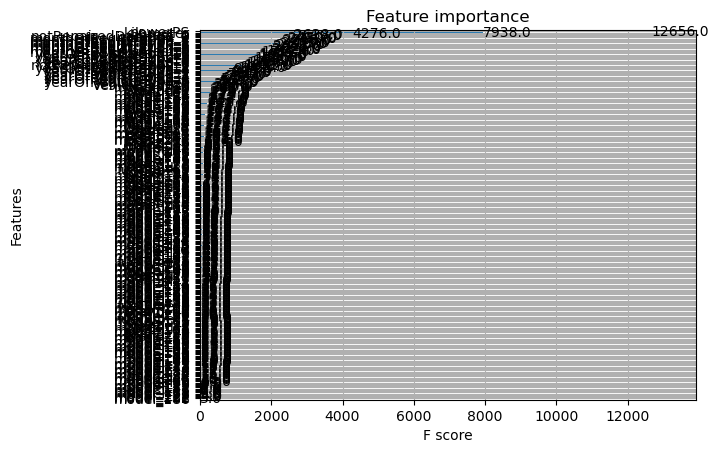

In [52]:
xgb.plot_importance(xg_reg)

In [41]:
cat_model = CatBoostRegressor(iterations=100,learning_rate=0.05, depth=6,verbose=10,task_type='GPU',save_snapshot=True, snapshot_file='catboost temp file',snapshot_interval=10)  # eval_metric='MAE',

In [42]:
cat_model.fit(x_train,y_train,eval_set=(x_test,y_test))

0:	learn: 3100.9869465	test: 3098.8640306	best: 3098.8640306 (0)	total: 13ms	remaining: 1.29s
10:	learn: 2533.4265499	test: 2535.8536687	best: 2535.8536687 (10)	total: 60.1ms	remaining: 486ms
20:	learn: 2190.6891240	test: 2193.9010868	best: 2193.9010868 (20)	total: 104ms	remaining: 391ms
30:	learn: 1989.7837540	test: 1992.8212786	best: 1992.8212786 (30)	total: 152ms	remaining: 338ms
40:	learn: 1864.3523728	test: 1866.6538290	best: 1866.6538290 (40)	total: 202ms	remaining: 291ms
50:	learn: 1768.7674886	test: 1771.7995441	best: 1771.7995441 (50)	total: 241ms	remaining: 231ms
60:	learn: 1693.3326137	test: 1696.1050899	best: 1696.1050899 (60)	total: 294ms	remaining: 188ms
70:	learn: 1637.4384565	test: 1639.9084446	best: 1639.9084446 (70)	total: 336ms	remaining: 137ms
80:	learn: 1592.8936275	test: 1595.3149064	best: 1595.3149064 (80)	total: 378ms	remaining: 88.7ms
90:	learn: 1557.3544368	test: 1559.6601177	best: 1559.6601177 (90)	total: 420ms	remaining: 41.5ms
99:	learn: 1531.5140018	test: 

In [43]:
y_pred = cat_model.predict(x_test)

In [44]:
mean_absolute_error(y_test,y_pred)

1105.0176357239216

In [45]:
r2_score(y_test,y_pred)

0.7678061531927945